In [209]:
import numpy as np
import pandas as pd
import os

In [210]:
import bs4 as bs
import urllib.request

In [211]:
import requests
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_population'
html = requests.get(url).content
df_list = pd.read_html(html,index_col=0)
df = df_list[-1]

In [212]:
states=df.iloc[:,[0,1,8,9]]
states.rename(columns={'State or union territory':'State'},inplace=True)
states.loc[states.State=='Manipur[d]','State']='Manipur'
states.loc[states.Population=='49,577,103[b]','Population']='49577103'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-212-7f0170960fb4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states.loc[states.State=='Manipur[d]','State']='Manipur'


In [213]:
states

,State,Population,Area[16],Density[a]
Rank,,,,
1,Uttar Pradesh,199812341,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)"
2,Maharashtra,112374333,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi)
3,Bihar,104099452,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)"
4,West Bengal,91276115,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)"
5,Madhya Pradesh,72626809,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi)
6,Tamil Nadu,72147030,"130,051 km2 (50,213 sq mi)","555/km2 (1,440/sq mi)"
7,Rajasthan,68548437,"342,239 km2 (132,139 sq mi)",201/km2 (520/sq mi)
8,Karnataka,61095297,"191,791 km2 (74,051 sq mi)",319/km2 (830/sq mi)
9,Gujarat,60439692,"196,024 km2 (75,685 sq mi)",308/km2 (800/sq mi)


In [214]:
states.shape

(37, 4)

In [215]:
latest=pd.read_csv("https://api.covid19india.org/csv/latest/state_wise.csv",usecols=('State',
                                                                                     'Confirmed', 'Recovered', 
                                                                                     'Deaths', 'Active'))

In [216]:
#states.sort_values(by='State or union territory',ascending=True)
final=states.merge(latest,how='left',on='State')
final=final.drop(36)                                   #Since India is not a State

In [217]:
# Extrapolating the Population

final['Population']=final['Population'].astype(int)
final['Population']=final['Population']*1.112
final['Population']=final['Population'].astype(int)

# pRE pRoCeSSing.............................  :<

In [218]:
# Calculating CFR
# IFR : Infection Fatality Ratio.....

final['IFR']=final['Deaths']/(final['Confirmed']*16)*100

![](ifr.png)

In [219]:
# Calculating CFR during an ongoing epidemic
# CFR : Case Fatality Ratio

final['CFR']=final['Deaths']/(final['Deaths']+final['Recovered'])*100

![](case.png)

In [220]:
# Cases per Million

#final['Confrm_per_M']=round(final['Confirmed']/(final['Population'])*1000000,2 )   
final['Deaths_per_M']=round(final['Deaths']/(final['Population'])*1000000,2 )   
final['Active_per_M']=round(final['Active']/(final['Population'])*1000000,2)    

In [221]:
final=final.fillna(0)

#### Adding age group factor on the basis of table given below:

![](bingo.png)

In [222]:
#final['Age(45-64)']=final['                   
final['Age(65+)']=final['Population']*0.12                        

![](f_1.png)

In [223]:
# MAIN WORKERS.......
# (Gas Supply, Manufacturing, Retail)
# So, I have considered 35% of the population as Main_Workers

final['Main_workers']=final['Population']*0.35 

In [224]:
final.head()

,State,Population,Area[16],Density[a],Confirmed,Recovered,Deaths,Active,IFR,CFR,Deaths_per_M,Active_per_M,Age(65+),Main_workers
0,Uttar Pradesh,222191323,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",588882.0,567964.0,8413.0,12505.0,0.089290,1.459635,37.86,56.28,26662958.76,77766963.05
1,Maharashtra,124960258,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),1947011.0,1847361.0,49695.0,48801.0,0.159523,2.619585,397.69,390.53,14995230.96,43736090.30
2,Bihar,115758590,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",254278.0,248640.0,1408.0,4229.0,0.034608,0.563092,12.16,36.53,13891030.80,40515506.50
3,West Bengal,101499039,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",555572.0,536084.0,9817.0,9671.0,0.110438,1.798311,96.72,95.28,12179884.68,35524663.65
4,Madhya Pradesh,80761011,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),244647.0,232390.0,3648.0,8609.0,0.093196,1.545514,45.17,106.60,9691321.32,28266353.85


In [225]:
#final['result'] = final['result'].map(lambda x: xrstrip(' km2'))

final=final.rename(columns={'Area[16]':'Area','Density[a]':'Density'})
final['Area'] = final['Area'].apply(lambda x: x.split('km2')[0].strip())
final['Density'] = final['Density'].apply(lambda x: x.split('/km2')[0].strip())

In [226]:
final.Area=final.Area.apply(lambda cx: cx.replace(',',''))
final.Density=final.Density.apply(lambda cx: cx.replace(',',''))

In [227]:
final['Density']=final['Density'].astype(float)
final['Density']=round(final['Density']*1.112)

In [255]:
EY.drop(0,1,inplace=True)

In [3]:
#EY.sort_values(by='Age(65+)',ascending=True)

NameError: name 'EY' is not defined

In [257]:
EY.Main_workers.mean()

13460800.3

In [1]:
#EY['Main_workers']=EY['Main_workers'].astype(int)

In [2]:
wss1=[]
wss2=[]
wss3=[]
def dummy(x):
    for i in x['Main_workers'].index:
        if i>10000000:
            wss1.append(x['Main_workers'][i])
            elif i>1000000:
                wss2.append(x['Main_workers'][i])
                else wss3.append(x['Main_workers'][i])

SyntaxError: invalid syntax (<ipython-input-2-a0adff6affe8>, line 8)

In [266]:
#EY['Main_workers']=EY['Main_workers'].apply(dummy,1)

NameError: name 'dummy' is not defined

In [4]:
EY

NameError: name 'EY' is not defined

***************************************************************************************************************************
# Clustering using Kmeans 


In [86]:
from sklearn.cluster import KMeans
import sklearn.cluster as cl

In [148]:
clus=EY.iloc[:,[8,9,10,12,16]].values

In [149]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cluster=sc.fit_transform(clus)

In [150]:
cluster.shape

(35, 5)

#### Choosing the best cluster for our algorithm

In [151]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


# Calculating the wcss scores

wss=[]
for i in range(1,13):
    kmns=cl.KMeans(n_clusters=i).fit(cluster)
    wss_itr=kmns.inertia_
    wss.append(wss_itr)
    
scores=pd.DataFrame({'clusters':range(1,13),'WSS Scores':wss})

In [ ]:
scores

### Elbow plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Inertia of Cosine k-Means versus number of clusters')

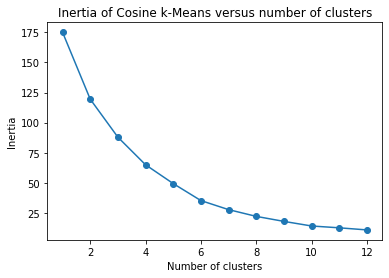

In [152]:
k=range(1,13)
sns.lineplot(k, wss)
plt.scatter(k, wss)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")

 Using the above elbow graph, proper bend can be seen at cluster '5'. Hence, we will choose our number of clusters to be 5

# Silhoutte score

In [158]:
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score

for i in range(2,13):
    labels=cl.KMeans(n_clusters=i).fit(cluster).labels_
    print('Silhoutte Score for '+str(i)+' clusters is '+str(metrics.silhouette_score(cluster,labels,metric='euclidean')))

Silhoutte Score for 2 clusters is 0.2866777860097096
Silhoutte Score for 3 clusters is 0.29992710669886585
Silhoutte Score for 4 clusters is 0.31911592826275575
Silhoutte Score for 5 clusters is 0.32564738207782484
Silhoutte Score for 6 clusters is 0.34669294995081024
Silhoutte Score for 7 clusters is 0.35591119392015563
Silhoutte Score for 8 clusters is 0.3520939357970589
Silhoutte Score for 9 clusters is 0.3082524943262328
Silhoutte Score for 10 clusters is 0.3040191659673794
Silhoutte Score for 11 clusters is 0.2720293530272421
Silhoutte Score for 12 clusters is 0.3086362917185895


# Clustering using K-Means

In [159]:
kmeans = KMeans(n_clusters=7).fit(cluster) 
EY['cluster_labels']=kmeans.labels_

In [160]:
EY.cluster_labels.value_counts()

1    12
0    10
6     5
2     4
5     2
4     1
3     1
Name: cluster_labels, dtype: int64

In [167]:
EY.loc[EY.cluster_labels==]

,State,Population,Area,Density,Confirmed,Recovered,Deaths,Active,IFR,CFR,Deaths_per_M,Active_per_M,Age(65+),Main_workers,64days_Confrm_rate,64days_Reco_rate,64days_Death_rate,cluster_labels,Toooo
0,Uttar Pradesh,222191323,240928,921.0,588882.0,567964.0,8413.0,12505.0,0.08929,1.459635,37.86,56.28,26662958.76,77766963.05,22.514695,26.360767,19.922934,3,63939.413681


### State-Code with  names

In [232]:
url = 'https://slusi.dacnet.nic.in/watershedatlas/list_of_state_abbreviation.htm'
html = requests.get(url).content
df_list1 = pd.read_html(html)
code = df_list1[1]
code=code.drop(0,0)

In [233]:
code=code.rename(columns={1:'State',2:'Code'})
code.loc[code.State=='Dadra and Nagar Haveli','State']='Dadra and Nagar Haveli and Daman and Diu'
code.loc[code.State=='Orissa','State']='Odisha'
code.loc[code.State=='Pondicherry','State']='Puducherry'
code.loc[code.State=='Lakshadweep','State']='Ladakh'
code=code.drop(34,0)

In [234]:
code

,0,State,Code
1,1.,Andhra Pradesh,AP
2,2.,Arunachal Pradesh,AR
3,3.,Assam,AS
4,4.,Bihar,BR
5,5.,Chhattisgarh,CG
6,6.,Goa,GA
7,7.,Gujarat,GJ
8,8.,Haryana,HR
9,9.,Himachal Pradesh,HP
10,10.,Jammu and Kashmir,JK


******************************************************************************************************************************
# PreProcessing for growth rates on the basis of last 64 days

In [235]:
dml=pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')
dml['DH']=dml['DN']+dml['DD']
dml=dml.drop(['DN','DD','LD','UN'],1)
dml=dml.rename(columns={'UT':'UK','LA':'LD'})

In [236]:
dml.T

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
Date,14-Mar-20,14-Mar-20,14-Mar-20,15-Mar-20,15-Mar-20,15-Mar-20,16-Mar-20,16-Mar-20,16-Mar-20,17-Mar-20,...,01-Jan-21,02-Jan-21,02-Jan-21,02-Jan-21,03-Jan-21,03-Jan-21,03-Jan-21,04-Jan-21,04-Jan-21,04-Jan-21
Date_YMD,2020-03-14,2020-03-14,2020-03-14,2020-03-15,2020-03-15,2020-03-15,2020-03-16,2020-03-16,2020-03-16,2020-03-17,...,2021-01-01,2021-01-02,2021-01-02,2021-01-02,2021-01-03,2021-01-03,2021-01-03,2021-01-04,2021-01-04,2021-01-04
Status,Confirmed,Recovered,Deceased,Confirmed,Recovered,Deceased,Confirmed,Recovered,Deceased,Confirmed,...,Deceased,Confirmed,Recovered,Deceased,Confirmed,Recovered,Deceased,Confirmed,Recovered,Deceased
TT,81,9,2,27,4,0,15,1,0,11,...,237,18144,20903,216,16678,19658,215,16273,29186,200
AN,0,0,0,0,0,0,0,0,0,0,...,0,1,7,0,1,9,0,0,0,0
AP,1,0,0,0,0,0,0,0,0,0,...,0,238,279,3,232,352,4,128,252,3
AR,0,0,0,0,0,0,0,0,0,0,...,0,8,10,0,5,7,0,9,15,0
AS,0,0,0,0,0,0,0,0,0,0,...,4,38,80,2,15,60,1,36,67,2
BR,0,0,0,0,0,0,0,0,0,0,...,3,397,490,3,282,631,2,344,430,3
CH,0,0,0,0,0,0,0,0,0,0,...,1,66,117,1,16,54,1,55,68,1


In [237]:
dml_1=dml.loc[dml.Status=='Confirmed']
dml_1=dml_1.drop(['Date','Date_YMD','Status'],1)
dml_2=dml.loc[dml.Status=='Recovered']
dml_2=dml_2.drop(['Date','Date_YMD','Status'],1)
dml_3=dml.loc[dml.Status=='Deceased']
dml_3=dml_3.drop(['Date','Date_YMD','Status'],1)
dml_1=dml_1.T
dml_2=dml_2.T
dml_3=dml_3.T

In [238]:
dml_3.loc[:,:692].sum(1)   # Before 80 days

TT    121685
AN        59
AP      6676
AR        37
AS       930
BR      1084
CH       225
CT      2038
DL      6470
GA       602
GJ      3713
HR      1777
HP       306
JK      1471
JH       883
KA     11147
KL      1458
LD        74
MP      2942
MH     43836
MN       164
ML        87
MZ         1
NL        33
OR      1361
PY       592
PB      4187
RJ      1898
SK        67
TN     11091
TG      1330
TR       343
UP      7007
UK      1011
WB      6784
DH         2
dtype: int64

In [239]:
psych=pd.DataFrame()
psych
psych['64days_Confrm_rate']=(dml_1.iloc[:,:].sum(1)-dml_1.loc[:,:690].sum(1))/dml_1.loc[:,:690].sum(1)*100
psych['64days_Reco_rate']=(dml_2.iloc[:,:].sum(1)-dml_2.loc[:,:691].sum(1))/dml_2.loc[:,:691].sum(1)*100
psych['64days_Death_rate']=(dml_3.iloc[:,:].sum(1)-dml_3.loc[:,:692].sum(1))/dml_3.loc[:,:692].sum(1)*100

In [240]:
#psych=psych.dropna()

psych['Code'] = psych.index
psych.shape

(36, 4)

In [241]:
#dml_1.iloc[:,:].sum()

In [242]:
dml.groupby('Status')['TT'].sum()
psych

,64days_Confrm_rate,64days_Reco_rate,64days_Death_rate,Code
TT,27.305183,34.241605,23.178699,TT
AN,14.630188,18.932874,5.084746,AN
AP,7.634374,10.753005,6.620731,AP
AR,13.482918,29.905299,51.351351,AR
AS,5.014254,9.005728,13.870968,AS
BR,17.740920,20.333938,29.889299,BR
CH,38.917149,43.648378,42.666667,CH
CT,52.998284,67.996744,67.419038,CT
DL,64.356311,78.515275,63.786708,DL
GA,18.239819,23.093865,23.421927,GA


## Merging both the Tables to get the State-Code

In [243]:
merged=code.merge(psych,how='left',on='Code')

In [244]:
merged.shape

(36, 6)

In [245]:
merged.isna().sum()

0                     0
State                 0
Code                  0
64days_Confrm_rate    1
64days_Reco_rate      1
64days_Death_rate     1
dtype: int64

### As we can see, data for Chattisgarh is missing in the given dataset. So, I am gonna impute it manually using the data given below.


64days_Confrm_rate -> (280-211)/211 * 100

64days_Recov_rate -> (265-178)/178 * 100

64days_Death_rate -> (3370-1673)/1673 * 100

![](f_2.png)

In [246]:
merged.loc[merged.Code=='CG','64days_Confrm_rate']=32.7
merged.loc[merged.Code=='CG','64days_Reco_rate']=48.876
merged.loc[merged.Code=='CG','64days_Death_rate']=101.111

In [247]:
#merged=merged.drop(0,1)

In [248]:
EY=final.merge(merged,how='left',on='State')
EY=EY.drop('Code',1)

In [249]:
EY.isna().sum()

State                 0
Population            0
Area                  0
Density               0
Confirmed             0
Recovered             0
Deaths                0
Active                0
IFR                   0
CFR                   0
Deaths_per_M          0
Active_per_M          0
Age(65+)              0
Main_workers          0
0                     2
64days_Confrm_rate    2
64days_Reco_rate      2
64days_Death_rate     2
dtype: int64

#### We can see some null values as few state names are not same in both the tables. The table is almost ready for clustering.
Lets do some tricks...........................                                       :)

In [250]:
EY=EY.drop([23,5],0)

In [251]:
EY.isna().sum()

State                 0
Population            0
Area                  0
Density               0
Confirmed             0
Recovered             0
Deaths                0
Active                0
IFR                   0
CFR                   0
Deaths_per_M          0
Active_per_M          0
Age(65+)              0
Main_workers          0
0                     2
64days_Confrm_rate    2
64days_Reco_rate      2
64days_Death_rate     2
dtype: int64

# NOTE 
#### Ladakh and Telangana are newly added states. So, one thing we could do is remove these two states or impute those values based on mean. But we are clustering the states on cases, hence imputation through mean will give undesired results.

Since Lakshwadeep is not adding much value, we can ignore this row and the state doesn't even have many covid positive cases. 

In [252]:
EY.drop(37,0,inplace=True)

In [253]:
# imputing all the values manually by searching it on google

EY.loc[EY.State=='Telangana','64days_Confrm_rate']=13
EY.loc[EY.State=='Telangana','64days_Reco_rate']=24
EY.loc[EY.State=='Telangana','64days_Death_rate']=38

In [254]:
EY.to_csv('EY.csv')